Hypothesis Testing:
    Let’s talk about t-tests, p-values.  How are they related?  
    What is it telling you?  How does it relate to precision-recall?  
    What are the underlying assumptions
    
In hypothesis testing, we make a hypothesis, gather data, and choose to continue to hold or to reject that hypothesis.
Frequently, the hypothesis being tested is whether there is a difference between two groups or populations, versus the null hypothesis that the two groups are the same. The t-tests are a measure of the difference between two groups adjusted for 
the variation within the groups, and a p-value indicates the probablity that the measured difference arose by chance. The 
higher the t-test, the lower the p-value, and so the greater liklihood we can reject the null hypothesis. 
    
The threshold we use to reject the null hypothesis can vary, and we can use a two-sided test which attempts to determine 
whether the sample value differs from the null hypothesis, or a one-sided test which can attempt whether the sample value is 
either greater of less than the null hypothesis would predict. Setting the treshold for significance involves a tradeoff 
between precision and recall. Setting a stricter thresold, that is demanding a higher t-test and lower p-value increases the 
precision of the test. A higher precision means that of the incidents where the tests show a significant difference is detected, there is a greater chance that there is a greater difference in actuality. This can come at cost of recall, which is the chance that if there is a difference in reality, the tests will show a significant difference as well. In other words, a high precision indicates a low rate of false positives, while a high recall indicates a low rate of false negatives. 

recall = True positive / (True positive + False negative)
precision = True positive / (True positive + False positive)

Which should be prioritized depends on the application. 

The t-test value is actually calculated by dividing the difference between the means of the two groups by ratio of the sample standard deviation over the sample size. Once the t-value has been calculated, it is used together with degrees of freedom which is the sample size -1 to get a p-value. To get these values, t-test involves a number of assumptions, the most important of which is that the samples have been drawn at random from a normal distribution. It also assumes variance is homogenous and the distribution is continous. 
    
    
    
    
Bayesian Posterior Inference:
    Explain Bayes’ Rule.  Write some code to actually perform posterior sampling.
    Work out an example using conjugate priors.  How does this compare with hypothesis testing?  
    What are the underlying assumptions?
    


Bayes' Rule: P(A|B)= [P(B|A) * P(A)]/ P(B)

Bayes' Rule is about revising our expectations with new data. We have some prior idea of how the liklihood of some event A is distributed, which is P(A). We have some information B. To calculated our revised expectation, we multiply are prior idea with the likelihood that we'd get B given A, divided by the overall likelihood of B, and that gives us our new expectation for A given B. 

Bayesian inference is a powerful tool. Unlike hypothesis testing in which we hold on to or reject a hypothesis, Bayesian inference can give an actual probablity distribution. It is also not limited to  normal distributions, although it is often helpful if the distributions are in the category of functions known as conjugate priors, where we can analytically compute the revised distribution. If the revisied distribution can not be computed analytically, we can compute it by sampling from it. It does require that both P(A) and P(B) be nonzero, and if our prior assumptions about the distribution of A is highly inaccurate, it can take a large amount of data points to get towards an accurate posterior distribution. 

In [66]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm

np.random.seed(123)

In [67]:
data = np.random.randn(20)

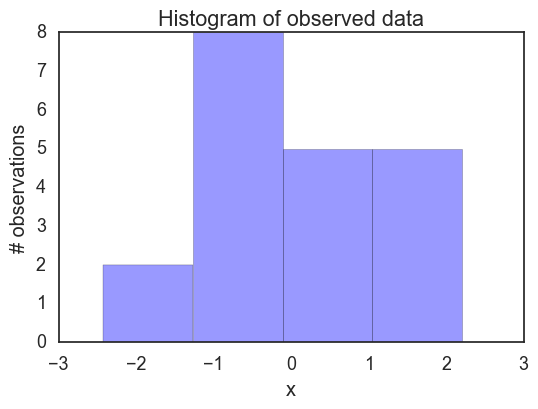

In [68]:
ax = plt.subplot()
sns.distplot(data, kde=False, ax=ax)
_ = ax.set(title='Histogram of observed data', xlabel='x', ylabel='# observations');
plt.show()

In [69]:
def sampler(data, samples=4, mu_init=.5, proposal_width=.5, plot=False, mu_prior_mu=0, mu_prior_sd=1.):
    mu_current = mu_init
    posterior = [mu_current]
    for i in range(samples):
        # suggest new position
        mu_proposal = norm(mu_current, proposal_width).rvs()

        # Compute likelihood by multiplying probabilities of each data point
        likelihood_current = norm(mu_current, 1).pdf(data).prod()
        likelihood_proposal = norm(mu_proposal, 1).pdf(data).prod()
        
        # Compute prior probability of current and proposed mu        
        prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
        prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)
        
        p_current = likelihood_current * prior_current
        p_proposal = likelihood_proposal * prior_proposal
        
        # Accept proposal?
        p_accept = p_proposal / p_current
        
        # Usually would include prior probability, which we neglect here for simplicity
        accept = np.random.rand() < p_accept
        
        
        if accept:
            # Update position
            mu_current = mu_proposal
        
        posterior.append(mu_current)
        
    return posterior


    


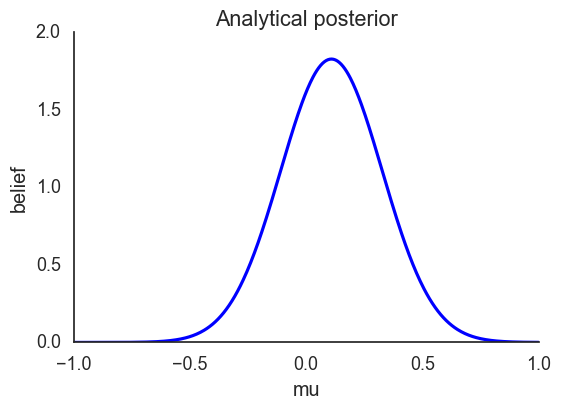

In [70]:
def calc_posterior_analytical(data, x, mu_0, sigma_0):
    sigma = 1.
    n = len(data)
    mu_post = (mu_0 / sigma_0**2 + data.sum() / sigma**2) / (1. / sigma_0**2 + n / sigma**2)
    sigma_post = (1. / sigma_0**2 + n / sigma**2)**-1
    return norm(mu_post, np.sqrt(sigma_post)).pdf(x)

ax = plt.subplot()
x = np.linspace(-1, 1, 500)
posterior_analytical = calc_posterior_analytical(data, x, 0., 1.)
ax.plot(x, posterior_analytical)
ax.set(xlabel='mu', ylabel='belief', title='Analytical posterior');
sns.despine()

plt.show()

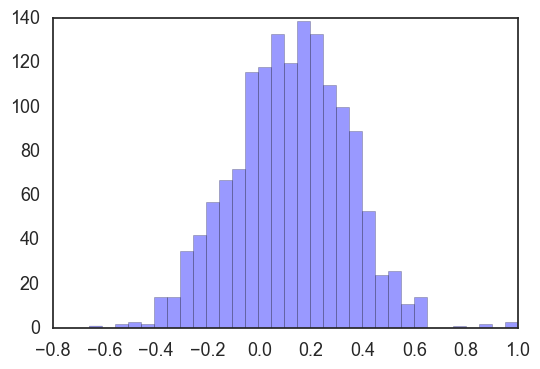

In [71]:







posterior = sampler(data, samples=1500, mu_init=1.)
#fig, ax = plt.subplots()
#ax.plot(posterior)
#_ = ax.set(xlabel='sample', ylabel='mu');


ax = plt.subplot()

#sns.distplot(posterior, ax=ax, label='estimated posterior')
sns.distplot(posterior, kde=False, ax=ax, label='estimated posterior')
plt.show()

